**Описание проекта**

    Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 
    Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
    После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.
    Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.
    В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

**Описание данных**

Каждая запись в логе — это действие пользователя, или событие. 
    
    EventName — название события;
    DeviceIDHash — уникальный идентификатор пользователя;
    EventTimestamp — время события;
    ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math as mth
from scipy import stats as st

## Подготовка данных ##

In [2]:
data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

In [3]:
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [4]:
data.columns = ['event_name', 'user_id', 'event_timestamp', 'exp_id']

**Измененное описание данных**

Каждая запись в логе — это действие пользователя, или событие. 
    
    event_name — название события;
    user_id — уникальный идентификатор пользователя;
    event_timestamp — время события;
    exp_id — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

In [5]:
data

,event_name,user_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


**Пропуски**

In [6]:
data.isna().sum()

event_name         0
user_id            0
event_timestamp    0
exp_id             0
dtype: int64

**Форматы**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   user_id          244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [8]:
data['datetime'] = pd.to_datetime(data['event_timestamp'], unit='s')

In [9]:
data

,event_name,user_id,event_timestamp,exp_id,datetime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58


In [10]:
data['date'] = data['datetime'].dt.date

In [11]:
data

,event_name,user_id,event_timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   user_id          244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   exp_id           244126 non-null  int64         
 4   datetime         244126 non-null  datetime64[ns]
 5   date             244126 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


In [13]:
data['date'] = data['date'].astype('datetime64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   user_id          244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   exp_id           244126 non-null  int64         
 4   datetime         244126 non-null  datetime64[ns]
 5   date             244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


**Дубликаты**

In [14]:
data.duplicated().sum()

413

In [15]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [16]:
data = data.reset_index(drop=True)

**Таблица готова для анализа**

## Изучение и проверка данных ##

Кол-во событий в логе

In [17]:
data['event_name'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

**кол-во уникальных событий:**

In [18]:
unique_event = data['event_name'].nunique()
unique_event

5

**общее кол-во событий:**

In [19]:
data['event_name'].count()

243713

**кол-во пользователей:**

In [20]:
data['user_id'].nunique()

7551

**Cреднее кол-во событий ,приходящихся на пользователя:**

In [21]:
data['event_name'].count()/data['user_id'].nunique()

32.27559263673685

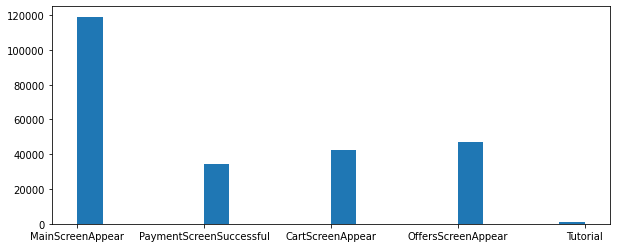

In [76]:
plt.figure(figsize=(10,4))
plt.hist(data['event_name'], bins=20);


**Распределение данных по времени:**

In [23]:
print('Начало периода:', data['date'].min())
print('Конец периода:', data['date'].max())


Начало периода: 2019-07-25 00:00:00
Конец периода: 2019-08-07 00:00:00


In [24]:
print('Период:', data['date'].max() - data['date'].min())

Период: 13 days 00:00:00


Нам предоставленны данные за 13ти дневный период.

In [25]:
pd.pivot_table(data,index='date', values='event_name', aggfunc='count')

,event_name
date,
2019-07-25,9
2019-07-26,31
2019-07-27,55
2019-07-28,105
2019-07-29,184
2019-07-30,412
2019-07-31,2030
2019-08-01,36141
2019-08-02,35554


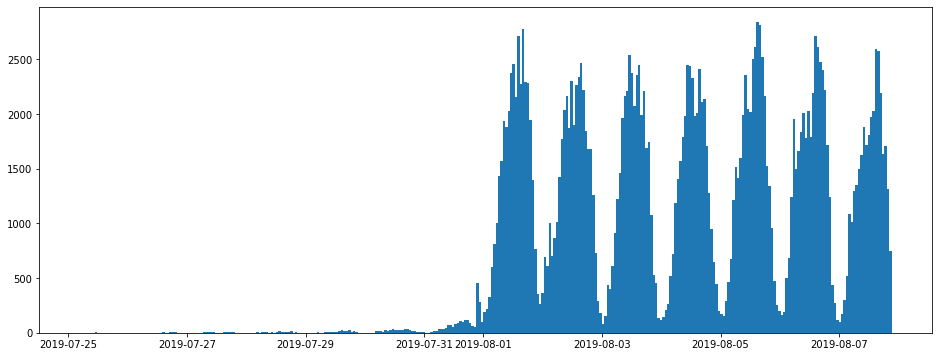

In [51]:
plt.figure(figsize=(16,6))
plt.hist(data['datetime'], bins=14*24);

Исходя из графика, можно сделать вывод, что данные распределенны неравномерно и большая часть активности происходила в последнюю неделю, по этому отсекаю данные до 1 августа.

In [27]:
new_data = data[data['date']> '2019-07-31'].reset_index(drop=True)
data['date'].min()

Timestamp('2019-07-25 00:00:00')

Чтобы  анализ был объективен необходимо учитывать события с 1 августа, так как события за июль имеют низкую активность.

 **Кол-во событий и пользователей,которые были потеряны, отбросив старые данные**

In [28]:
print('Кол-во потерянных пользователей:', data['user_id'].nunique()- new_data['user_id'].nunique())
print('Кол-во потерянных событий:', data['event_name'].count()- new_data['event_name'].count())

Кол-во потерянных пользователей: 17
Кол-во потерянных событий: 2826


In [79]:
(data['user_id'].nunique()- new_data['user_id'].nunique())/data['user_id'].nunique()*100

0.22513574361011784

In [80]:
(data['event_name'].count()- new_data['event_name'].count())/data['event_name'].count()*100

1.159560630741897

**Проверим кол-во представителей разных групп**

In [31]:
new_data['exp_id'].value_counts()

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

Отлично, тестирование можно будет проводить!

## Изучение воронки событий ##

**Количество событий логах, как часто они встречаются**

In [32]:
new_data.groupby('event_name')['event_name'].count().sort_values(ascending=False)

event_name
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

**кол-во пользователей, совершавших каждое из этих событий:**

In [33]:
cnt_user = pd.pivot_table(new_data, index='event_name',values='user_id',aggfunc='nunique').sort_values(by='user_id', ascending=False)
cnt_user

,user_id
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


Доля пользователей, которые хоть раз совершали событие:

In [34]:
total_user =  pd.pivot_table(new_data, index='event_name',values='user_id',aggfunc='count').sort_values(by='user_id', ascending=False)
total_user

,user_id
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


In [35]:
cnt_user['user_id']/new_data['user_id'].nunique()*100

event_name
MainScreenAppear           98.473586
OffersScreenAppear         60.963632
CartScreenAppear           49.561986
PaymentScreenSuccessful    46.973719
Tutorial                   11.149456
Name: user_id, dtype: float64

**Порядок событий**

    MainScreenAppear - появление главного экрана
    OffersScreenAppear - появление предложения на экране
    CartScreenAppear - появление экрана корзины
    PaymentScreenSuccessful - появиление экрана Платеж Успешен
    Tutorial - руководство

Все события входят в структурированную цепочку, кроме `Tutorial`. Думаю, что чтение руководства не популярное занятие и его можно не учитывать в воронке.

Какая доля пользователей проходит на следующий шаг воронки: 

In [36]:
cnt_user

,user_id
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [37]:
prev_users = cnt_user['user_id'][0]
for i in cnt_user.index:
    cnt_user.loc[i,'procent'] = (cnt_user.loc[i,'user_id'] / prev_users * 100).round(1)
    prev_users = cnt_user.loc[i,'user_id']
cnt_user

,user_id,procent
event_name,,
MainScreenAppear,7419,100.0
OffersScreenAppear,4593,61.9
CartScreenAppear,3734,81.3
PaymentScreenSuccessful,3539,94.8
Tutorial,840,23.7


Больше всего пользователей теряются после появления гавного экрана. Что то может их отталкивать от дальнейшего действия в приложении, это может быть что угодно , от неудобного интерфейса до всплывающего банера. Для увеличения продаж, необходимо проработать данный вопрос!

In [39]:
print('Доля пользователей дошедших с первого до последнего шага:',(cnt_user['user_id'][3]/cnt_user['user_id'][0]*100).round(1),'%')

Доля пользователей дошедших с первого до последнего шага: 47.7 %


KeyError: 'event_name'

## Изучите результаты эксперимента ##

Кол-во пользователей в группах:


In [40]:
user_group = new_data.groupby('exp_id')['user_id'].nunique()
user_group['246+247'] = user_group[246] + user_group[247]
user_group

exp_id
246        2484
247        2513
248        2537
246+247    4997
Name: user_id, dtype: int64

пользователей в группах примерно равное кол-во, это хоршо для чистоты эксперемента

**Проверить корректности всех механизмов и расчётов**

Сначала сторим таблицу распределения событий среди участников групп

In [42]:
event_group_test = new_data[new_data['event_name']!='Tutorial'].pivot_table(
    index='event_name', 
    columns='exp_id', 
    values='user_id',
    aggfunc='nunique').sort_values(by=246, ascending=False)

event_group_test = event_group_test.reset_index()
event_group_test['246+247'] = event_group_test[246] + event_group_test[247]
event_group_test['total'] = event_group_test['246+247'] + event_group_test[248]
event_group_test


exp_id,event_name,246,247,248,246+247,total
0,MainScreenAppear,2450,2476,2493,4926,7419
1,OffersScreenAppear,1542,1520,1531,3062,4593
2,CartScreenAppear,1266,1238,1230,2504,3734
3,PaymentScreenSuccessful,1200,1158,1181,2358,3539


**Находят ли статистические критерии разницу между выборками 246 и 247.**

    Нулевая гепотеза: между группами нет значимой разницы
    Альтернативная гипотеза : между группами есть значимая разница

In [43]:
def test(group1, group2, alpha):
    for i in event_group_test.index:
        p1 = event_group_test[group1][i] / user_group[group1]
        p2 = event_group_test[group2][i] / user_group[group2]
        p_combined = ((event_group_test[group1][i] + event_group_test[group2][i]) / 
                      (user_group[group1] + user_group[group2]))
        difference = p1 - p2
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/user_group[group1] + 1/user_group[group2]))
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(event_group_test['event_name'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу")
        else:
            print("Не получилось отвергнуть нулевую гипотезу")
        print(p_value, '')
        
test(246, 247, 0.01)

MainScreenAppear p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу
0.7570597232046099 
OffersScreenAppear p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу
0.2480954578522181 
CartScreenAppear p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу
0.22883372237997213 
PaymentScreenSuccessful p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу
0.11456679313141849 


Вывод: между группами не найдена разница при альфа равном 0,01 . Тест работает корректно!

**Самое популярное событие:**

In [44]:
new_data['event_name'].value_counts().head(1)

MainScreenAppear    117328
Name: event_name, dtype: int64

самое популярное событие - показ главного экрана

**Число пользователей, совершивших самое популярное событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие.** 

Число пользователей по группам

In [45]:
pop_event = new_data[new_data['event_name']!='Tutorial'].pivot_table(
    index='event_name', 
    columns='exp_id', 
    values='user_id',
    aggfunc='nunique').sort_values(by=246, ascending=False)

pop_event.head(1)

exp_id,246,247,248
event_name,,,
MainScreenAppear,2450,2476,2493


Доля пользователей

In [46]:
pop_event['246+247'] = pop_event[246] + pop_event[247]
pop_event['total'] = pop_event['246+247'] + pop_event[248]
pop_event['del_246'] = (pop_event[246] / user_group[246] * 100).round(1)
pop_event['del_247'] = (pop_event[247] / user_group[247] * 100).round(1)
pop_event['del_248'] = (pop_event[248] / user_group[248] * 100).round(1)
pop_event['del_246+247'] = ((pop_event[246] + pop_event[247]) / \
                                  (user_group[246] + user_group[247]) * 100).round(1)
pop_event.head(1)

exp_id,246,247,248,246+247,total,del_246,del_247,del_248,del_246+247
event_name,,,,,,,,,
MainScreenAppear,2450,2476,2493,4926,7419,98.6,98.5,98.3,98.6


Доля пользователей по всем действиям:

In [47]:
pop_event

exp_id,246,247,248,246+247,total,del_246,del_247,del_248,del_246+247
event_name,,,,,,,,,
MainScreenAppear,2450,2476,2493,4926,7419,98.6,98.5,98.3,98.6
OffersScreenAppear,1542,1520,1531,3062,4593,62.1,60.5,60.3,61.3
CartScreenAppear,1266,1238,1230,2504,3734,51.0,49.3,48.5,50.1
PaymentScreenSuccessful,1200,1158,1181,2358,3539,48.3,46.1,46.6,47.2


     Нулевая гепотеза: между группами нет значимой разницы
     Альтернативная гипотеза : между группами есть значимая разница

В А/А тесте мы использовали критерий значимости 1% , сейчас мы выберали самый стандартный уровень значимости равный 5%

**A/B тест**

In [48]:
test(246, 248, 0.05)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу
0.2949721933554552 
OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу
0.20836205402738917 
CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу
0.07842923237520116 
PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу
0.2122553275697796 


    Нулевая гепотеза: между группами нет значимой разницы
    Альтернативная гипотеза : между группами есть значимая разница

In [49]:
test(247, 248, 0.05)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу
0.4587053616621515 
OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу
0.9197817830592261 
CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу
0.5786197879539783 
PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу
0.7373415053803964 


    Нулевая гепотеза: между группами нет значимой разницы
    Альтернативная гипотеза : между группами есть значимая разница

In [50]:
test('246+247', 248, 0.05)

MainScreenAppear p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу
0.29424526837179577 
OffersScreenAppear p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу
0.43425549655188256 
CartScreenAppear p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу
0.18175875284404386 
PaymentScreenSuccessful p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу
0.6004294282308704 


**Вывод: Значимой разницы между группами во всех тестах не выявлено, соответственно изменение шрифта в преложении не играет роли в увеличении конверсии.Тестирование можно назвать успешным - изменение шрифта не повлияло на поведение пользователей.**

Уровни значимости:

При проведении теста между контрольными группами, был выбран уровень статистической значимости равный 1%, так как мы заранее знали, что эти группы контрольные и нам необходимо было проверить работоспособность теста. Альфа равное 0.05 и более не стало бы явным показателем при проведении А/А теста. ПРи проведении А/А теста требуются более жесткие критерии.
При сравнении контрольных и эксперементальной группы был выбран уровень статистической значимости равный 5%  . Уровень значимости в 10% привел бы к погрешности.

Степень различия ключевых метрик по группам зависит от необходимой чувствительности эксперимента. Скажем, если вы хотите определить результаты теста, в котором ожидаете не менее 30% прироста, то 10% погрешности измерений нас устроят. Однако такое бывает редко: изменение показателей на 30% обычно заметно и без A/B-теста. Его применяют там, где степень различия между группами не больше 10%, или же подвержены колебаниям. В таких случаях точность A/A-теста в 1% — распространённый критерий.

Так как группы 246/247 должны быть одинаковыми, то над ними и контроль жестче. Поэтому для проведения A/A тестирования был взят уровень статистической значимости равный 1%. По результатам 246/247 тестирования для всех событий разница не оказалось значимой, поэтому эти группы считаем контрольными.*

Так как для A/B теста не нужна высокая точность, то для дальнейших экспериментов выберем самый стандартный уровень значимости равный 5%.

Так же можно использовать поправку Бонферони при проведении А/Б тестирования, в нашем случае она не сильно подойдет, так как мы имеем всего 16 сравнений.

Кол -во проверок статистических гипотез, совершенных в этом проекте:

    246/247 - 4 эксперемента (для каждого события) / уровень статистической значимости - 1%
    246/248 - 4 эксперемента (для каждого события) / уровень статистической значимости - 5%
    247/248 - 4 эксперемента (для каждого события) / уровень статистической значимости - 5%
    246+247/248 - 4 эксперемента (для каждого события) / уровень статистической значимости - 5% 
    Всего 16 экспериментов.


**Общий вывод:**

Нам были предоставлены данные о действиях пользователей за 2 недели, однако плотность действий выходит на значимый уровень только со второй недели, для дальнейшего анализа мы выбрали именно последнюю неделю.
Так же было выявленно самое популярное событие - это показ главного экрана.
Еще было выявленно самое непопулярное событие - показ руководства пользования, которое мы потом исключили при проведении тестов.
В ходе анализа было проведено 16 сравнительных тестов. Которые в свою очередь не нашли различий статистичой значимости между контрольными и эксперементольной группами.
По результатам тестов можно сделать вывод, что изменение шрифтов в преложении никак не вляиет на поведение пользователей, ни в плохую ни в хорошую сторону. Соответственно производить работы по изменению шрифтов считаю нецелесообразными.
Так же необходимо проработать вопрос о том, из за чего происходит большой 
"отсев" пользователей после просмотра главного экрана, считаю это более важной проблемой, которая увеличит конверсию!
